Code to analyse the boundary search done in the HMS O2 computing cluster.

After 30 days, one job failed for some cluster-related problem, and 4 didn't finish but were almost converged, as shown by the fact that there had only been 4 new points in the last it. 

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
#datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries'
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder='/Users/romartinez/Dropbox (HMS)/data/magic-universalb'
#datafolder='../clustersearch'
subfolder="2021_12_13_N6univ"
unfinishedfolder=os.path.join(datafolder,"2021_12_13_N6univ_scratch")
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="45947253"
njobs=80
basename="N6univ"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.5),10**(0.5)],[1e-1,1e1],[1e-2,1e2],[1e-3,1e3],[1e-6,1e6]] #copy-paste from the boundary search
absder="True"


In [3]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print()
                print( i,"last 1500 iterations:",np.sum(new[-1500:]), "last 1000:", np.sum(new[-1000:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,
12 last 1500 iterations: 1.0 last 1000: 0.0
13 ok,14 ok,15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 ok,23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,
32 last 1500 iterations: 2.0 last 1000: 0.0
33 ok,34 ok,35 ok,36 ok,37 ok,38 ok,39 ok,40 ok,41 ok,42 ok,43 ok,44 ok,45 ok,46 ok,47 ok,48 ok,49 ok,50 ok,51 ok,
52 last 1500 iterations: 2.0 last 1000: 1.0
53 ok,54 ok,55 ok,56 ok,57 !!!not long enough 205 17.0 6051.0
58 ok,59 ok,60 ok,61 ok,62 ok,63 ok,64 ok,65 ok,66 ok,67 ok,68 ok,69 ok,70 ok,71 ok,
72 last 1500 iterations: 3.0 last 1000: 0.0
73 ok,74 ok,75 ok,76 ok,77 ok,78 ok,79 ok,80 ok,

In [8]:
checkf=os.path.join(datafolder, "2021_12_13_N6univ/tocheck_N6univ") 
#tolerance 0.005
print(checkf)
command="wolframscript -file ../bin/N6univ_manualfix_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N6univ/tocheck_N6univ
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N6univ/tocheck_N6univ
Defined GRF
mat_N6univ_0.in
mat_N6univ_0_checked2.out

                                   -308
General::munfl: 0.316228 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.316228 3.70477 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.316228 4.88407 10     is too small to represent as a normalized machine number; precision may be lost.

General::stop: Further output of General::munfl will be suppressed during this calculation.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system

 not correct1.95479,0.315381;1.955,0.315;351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,
 not correct1.81528,0.342561;1.81,0.34;377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,
 not correct0.401055,0.380014;0.4,0.375;411,412,413,414,415,416,417,
 not correct1.66751,0.37997;1.665,0.38;419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,
 not correct1.53994,0.421354;1.54,0.42;451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,
 not correct0.40285,0.505001;0.4,0.5;499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,
 not correct0.402012,0.569914;0.4,0.57;533,534,535,536,

 not correct1.17869,0.656435;1.47,0.485;477,
 not correct1.1743,0.659795;1.465,0.49;479,
 not correct1.17149,0.666866;1.455,0.495;
 not correct1.17164,0.666438;1.46,0.495;482,
 not correct1.16528,0.667697;1.45,0.5;484,
 not correct1.15891,0.672184;1.44,0.505;
 not correct1.16352,0.672185;1.445,0.505;487,
 not correct1.1555,0.678077;1.435,0.51;489,
 not correct1.15448,0.676624;1.43,0.515;491,
 not correct1.14971,0.684977;1.425,0.52;493,
 not correct1.11539,0.72462;1.42,0.525;495,
 not correct1.10682,0.729715;1.42,0.53;497,
 not correct1.1183,0.73075;1.42,0.535;499,
 not correct1.11865,0.731363;1.42,0.54;501,
 not correct1.11587,0.740257;1.415,0.545;
 not correct0.743176,0.632495;0.4,0.55;
 not correct1.11559,0.748798;1.41,0.55;505,
 not correct1.11769,0.735527;1.405,0.555;507,
 not correct1.11936,0.73962;1.4,0.56;509,
 not correct1.1166,0.746018;1.395,0.565;511,
 not correct1.10447,0.798473;1.395,0.57;513,
 not correct1.1047,0.800858;1.39,0.575;515,
 not correct1.1045,0.785372;1.385,0.5

 not correct1.19499,0.620191;1.195,0.62;546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,

 not correct1.51636,0.422197;1.915,0.3;
 not correct1.51605,0.419825;1.92,0.3;
 not correct1.52029,0.417965;1.925,0.3;
 not correct1.71479,0.32217;1.93,0.3;
 not correct1.54613,0.414225;1.935,0.3;
 not correct1.54223,0.413697;1.94,0.3;
 not correct1.56378,0.410572;1.945,0.3;
 not correct1.56452,0.41016;1.95,0.3;
 not correct1.57083,0.409049;1.955,0.3;
 not correct1.57559,0.406837;1.96,0.3;
 not correct1.58097,0.405121;1.965,0.3;
 not correct1.58166,0.406237;1.97,0.3;316,317,318,
 not correct1.98688,0.304526;1.99,0.3;
 not correct1.99274,0.305075;1.995,0.3;
 not correct1.67767,0.361781;2.,0.3;
 not correct2.00487,0.305037;2.005,0.3;323,324,325,
 not correct2.02308,0.303079;2.025,0.3;
 not correct2.02999,0.301433;2.03,0.3;328,
 not correct2.0417,0.299922;2.04,0.3;
 not correct2.04237,0.300195;2.045,0.3;331,332,333,
 not correct1.99759,0.30781;2.,0.305;
 not correct2.00422,0.306363;2.005,0.305;
 not correct2.00808,0.305899;2.01,0.305;
 not correct2.01215,0.305182;2.015,0.305;338,
 not cor

 not correct1.33998,0.501133;1.34,0.5;484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,
 not correct1.26998,0.550143;1.27,0.55;508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,
 not correct1.22499,0.590086;1.225,0.59;525,526,527,528,529,530,531,532,533,534,535,536,537,
 not correct1.18996,0.625242;1.19,0.625;539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,

 not correct1.35511,0.300947;1.35,0.3;192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,
 not correct1.65236,0.299987;1.65,0.3;252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,
 not correct1.79501,0.300209;1.79,0.3;280,281,282,283,284,285,286,287,288,
 not correct1.83945,0.304951;1.84,0.3;290,291,292,293,294,295,296,297,298,299,300,301,
 not correct1.90769,0.30504;1.905,0.3;303,304,305,306,307,
 not correct1.93772,0.299898;1.935,0.3;309,310,311,
 not correct1.96019,0.302445;1.955,0.3;313,
 not correct1.96484,0.300996;1.965,0.3;315,316,317,
 not correct1.99115,0.301563;1.985,0.3;
 not correct1.99554,0.303995;1.99,0.3;
 not correct2.00105,0.302842;1.995,0.3;321,322,323,324,325,326,327,328,329,330,331,332,
 not correct2.06505,0.300066;2.06,0.3;334,

 not correct0.999553,0.967962;1.16,0.865;664,
 not correct1.02165,0.949461;1.155,0.87;666,
 not correct1.02133,0.95142;1.155,0.875;668,
 not correct1.01845,0.955522;1.15,0.88;670,
 not correct1.01579,0.958663;1.145,0.885;672,
 not correct1.01475,0.965801;1.145,0.89;674,
 not correct1.01278,0.968048;1.14,0.895;676,
 not correct1.0079,0.975635;1.135,0.9;678,
 not correct1.00383,0.97556;1.13,0.905;680,
 not correct1.00383,0.982696;1.13,0.91;682,
 not correct1.00249,0.981291;1.125,0.915;684,
 not correct0.998565,0.990171;1.12,0.92;686,
 not correct0.998747,0.990424;1.12,0.925;688,
 not correct0.99456,0.976333;1.095,0.93;
 not correct0.994845,0.979184;1.1,0.93;
 not correct0.99608,0.996013;1.115,0.93;692,
 not correct0.999173,0.971226;1.09,0.935;
 not correct0.993834,0.994441;1.105,0.935;
 not correct0.993775,0.996674;1.11,0.935;696,
 not correct0.998162,0.972833;1.085,0.94;698,
 not correct0.996619,0.975789;1.08,0.945;700,
 not correct1.00358,0.97794;1.08,0.95;702,
 not correct1.00148,0.98

 not correct1.22,0.616074;1.22,0.615;553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,
 not correct0.404929,0.905062;0.4,0.9;666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,

 not correct1.01378,0.961611;1.145,0.885;640,
 not correct1.01079,0.961089;1.135,0.89;
 not correct1.0112,0.961862;1.14,0.89;643,
 not correct1.00315,0.966577;1.13,0.895;645,
 not correct1.00565,0.941706;1.105,0.9;
 not correct1.00253,0.969318;1.125,0.9;
 not correct1.00279,0.969251;1.13,0.9;649,
 not correct0.996953,0.959974;1.11,0.905;
 not correct0.998651,0.965333;1.115,0.905;
 not correct0.998676,0.966941;1.12,0.905;653,
 not correct1.00332,0.949037;1.1,0.91;655,
 not correct1.00899,0.945682;1.09,0.915;
 not correct1.00041,0.951724;1.095,0.915;658,
 not correct1.00554,0.946084;1.085,0.92;660,
 not correct1.00105,0.955779;1.08,0.925;662,
 not correct1.00123,0.959743;1.08,0.93;664,
 not correct0.998619,0.964624;1.075,0.935;666,
 not correct1.02857,0.955358;1.075,0.94;668,
 not correct1.02769,0.955669;1.07,0.945;
 not correct1.02858,0.95561;1.075,0.945;671,
 not correct0.994446,0.976272;1.065,0.95;673,
 not correct1.04527,0.957673;1.06,0.955;675,
 not correct1.04015,0.965513;1.06,0.96

 not correct1.46506,0.436902;1.46,0.435;445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,
 not correct1.38499,0.47551;1.385,0.475;470,471,
 not correct1.37516,0.479999;1.375,0.48;473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,
 not correct1.325,0.510504;1.325,0.51;489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657

 not correct1.44251,0.438443;1.875,0.3;
 not correct1.45607,0.435741;1.88,0.3;
 not correct1.5934,0.343174;1.885,0.3;
 not correct1.51051,0.392657;1.89,0.3;
 not correct1.47619,0.429039;1.895,0.3;
 not correct1.49139,0.427123;1.9,0.3;
 not correct1.49847,0.424852;1.905,0.3;
 not correct1.49742,0.423812;1.91,0.3;
 not correct1.51657,0.420756;1.915,0.3;
 not correct1.91523,0.301963;1.92,0.3;
 not correct1.9171,0.301987;1.925,0.3;
 not correct1.5365,0.416802;1.93,0.3;308,
 not correct1.55221,0.41325;1.94,0.3;
 not correct1.5585,0.410561;1.945,0.3;
 not correct1.56464,0.412231;1.95,0.3;
 not correct1.93674,0.300805;1.955,0.3;
 not correct1.57531,0.406686;1.96,0.3;
 not correct1.57721,0.406376;1.965,0.3;
 not correct1.58403,0.404089;1.97,0.3;
 not correct1.96354,0.304666;1.975,0.3;317,
 not correct1.96937,0.300413;1.985,0.3;319,320,
 not correct1.99273,0.30356;2.,0.3;322,323,
 not correct1.69623,0.355745;2.015,0.3;
 not correct2.01218,0.304445;2.02,0.3;
 not correct2.02272,0.304616;2.025,0.

 not correct1.44062,0.299996;1.44,0.3;210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,
 not correct1.58565,0.30347;1.58,0.3;238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,
 not correct1.53922,0.314973;1.535,0.315;
 not correct1.54168,0.314987;1.54,0.315;255,256,257,258,259,260,261,262,263,264,
 not correct1.47932,0.329932;1.475,0.33;266,
 not correct1.4892,0.329994;1.485,0.33;268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,
 not correct1.28495,0.416023;1.285,0.415;324,325,326,327,328,329,330,
 not correct1.25993,0.430399;1.26,0.43;332,
 not correct1.24993,0.43708;1.25,0.435;334,335,336,337,338,339,340,341,342,343,344,345,
 not correct1.21482,0.46103;1.215,0.46;347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,36

 not correct0.40101,0.569988;0.4,0.57;534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,77

 not correct1.03386,1.00218;1.045,1.;693,
 not correct1.03245,1.00704;1.045,1.005;695,
 not correct1.02708,1.01367;1.045,1.01;697,
 not correct1.03925,1.01583;1.04,1.015;699,
 not correct1.02784,1.02336;1.04,1.02;701,
 not correct1.02448,1.02729;1.04,1.025;703,
 not correct1.03496,1.0316;1.035,1.03;705,
 not correct1.03385,1.03578;1.035,1.035;707,
 not correct1.01907,1.04579;1.035,1.04;709,
 not correct1.01877,1.04706;1.035,1.045;711,
 not correct1.02938,1.05232;1.03,1.05;713,
 not correct1.01826,1.05961;1.03,1.055;715,
 not correct1.01656,1.06145;1.03,1.06;717,718,719,
 not correct1.02395,1.07074;1.025,1.07;721,
 not correct1.01328,1.07884;1.025,1.075;723,
 not correct1.01149,1.08151;1.025,1.08;725,
 not correct1.01948,1.08855;1.02,1.085;727,
 not correct1.01899,1.09136;1.02,1.09;729,
 not correct1.01898,1.09521;1.02,1.095;731,
 not correct1.00726,1.10142;1.02,1.1;733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,
 not correct1.01456,1.11251;1.015,1.11;752,753,75

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
 not correct0.755104,0.30067;0.75,0.3;72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,
 not correct0.908293,0.299911;0.905,0.3;103,104,105,106,107,108,109,110,
 not correct0.954228,0.3;0.95,0.3;112,
 not correct0.965019,0.300899;0.96,0.3;114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,
 not correct1.5057,0.301577;1.5,0.3;
 not correct1.51019,0.301012;1.505,0.3;
 not corre

 not correct1.2671,0.56865;1.58,0.42;
 not correct1.27203,0.565623;1.585,0.42;443,
 not correct1.26199,0.574334;1.57,0.425;
 not correct1.2639,0.572448;1.575,0.425;446,
 not correct1.25233,0.582389;1.56,0.43;
 not correct1.25598,0.579409;1.565,0.43;449,
 not correct1.24334,0.589621;1.55,0.435;
 not correct1.24597,0.58739;1.555,0.435;452,
 not correct1.23946,0.594279;1.54,0.44;
 not correct1.24068,0.593128;1.545,0.44;455,
 not correct1.22745,0.604144;1.53,0.445;
 not correct1.22856,0.602704;1.535,0.445;458,
 not correct1.22308,0.609133;1.525,0.45;460,
 not correct1.21882,0.614083;1.515,0.455;
 not correct1.21961,0.613226;1.52,0.455;463,
 not correct1.20231,0.628326;1.505,0.46;
 not correct1.21059,0.62223;1.51,0.46;466,
 not correct1.2032,0.629356;1.5,0.465;468,
 not correct1.19318,0.632295;1.49,0.47;
 not correct1.19958,0.633999;1.495,0.47;471,
 not correct1.18955,0.637963;1.485,0.475;473,
 not correct1.18498,0.644189;1.475,0.48;
 not correct1.18774,0.647562;1.48,0.48;476,
 not correct1

 not correct0.399925,0.5515;0.4,0.55;506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746

 not correct1.51366,0.421917;1.915,0.3;305,306,307,308,309,310,
 not correct1.56846,0.409218;1.95,0.3;312,
 not correct1.57493,0.406766;1.96,0.3;
 not correct1.57808,0.405758;1.965,0.3;315,316,317,318,319,320,321,322,323,324,
 not correct2.01996,0.304116;2.02,0.3;326,327,328,329,
 not correct2.04531,0.299987;2.045,0.3;331,
 not correct1.98997,0.308975;1.99,0.305;333,334,335,
 not correct2.00993,0.305448;2.01,0.305;337,338,339,340,341,342,
 not correct1.9849,0.31003;1.985,0.31;344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,
 not correct1.87484,0.330376;1.875,0.33;369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,
 not correct1.40352,0.47977;1.745,0.355;393,394,395,396,
 not correct1.37976,0.489933;1.725,0.36;
 not correct1.39212,0.485832;1.73,0.36;399,400,401,
 not correct1.37526,0.488709;1.71,0.365;
 not correct1.3766,0.494583;1.715,0.365;
 not correct1.38587,0.485853;1.72,0.365;405,
 not correct

 not correct2.01753,0.303744;2.03,0.3;
 not correct2.02102,0.302677;2.035,0.3;
 not correct2.02587,0.301869;2.04,0.3;
 not correct2.03643,0.300444;2.045,0.3;
 not correct2.04038,0.299885;2.05,0.3;332,
 not correct1.9818,0.309403;1.995,0.305;
 not correct1.98944,0.307798;2.,0.305;
 not correct1.99451,0.307117;2.005,0.305;
 not correct1.99954,0.30662;2.01,0.305;
 not correct2.00451,0.305468;2.015,0.305;
 not correct2.00812,0.305232;2.02,0.305;339,
 not correct1.9556,0.314088;1.97,0.31;
 not correct1.96122,0.31307;1.975,0.31;
 not correct1.96751,0.311938;1.98,0.31;
 not correct1.97356,0.311023;1.985,0.31;
 not correct1.97671,0.310299;1.99,0.31;345,
 not correct1.92727,0.319259;1.94,0.315;
 not correct1.93032,0.318253;1.945,0.315;
 not correct1.93969,0.316975;1.95,0.315;
 not correct1.94507,0.316016;1.955,0.315;
 not correct1.95037,0.315034;1.96,0.315;
 not correct1.95044,0.315027;1.965,0.315;352,
 not correct1.90054,0.324165;1.915,0.32;
 not correct1.90814,0.322836;1.92,0.32;
 not correct

 not correct1.49055,0.329933;1.49,0.33;268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,5

 not correct0.405033,0.464402;0.4,0.46;477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,7

 not correct1.02044,1.04401;1.035,1.04;706,707,708,
 not correct1.02852,1.05229;1.03,1.05;710,
 not correct1.02869,1.05536;1.03,1.055;712,
 not correct1.01644,1.06138;1.03,1.06;714,
 not correct1.02459,1.06638;1.025,1.065;716,
 not correct1.02412,1.07328;1.025,1.07;718,
 not correct1.01182,1.07913;1.025,1.075;720,
 not correct1.01115,1.08232;1.025,1.08;722,
 not correct1.01954,1.08934;1.02,1.085;724,
 not correct1.01965,1.09081;1.02,1.09;726,
 not correct1.01894,1.09507;1.02,1.095;728,
 not correct1.00705,1.10145;1.02,1.1;730,731,732,733,734,735,736,737,738,739,
 not correct1.01419,1.10911;1.015,1.105;741,742,743,744,745,746,747,748,749,750,751,752,753,
 not correct1.01416,1.11551;1.015,1.115;755,756,757,758,
 not correct1.00575,1.1205;1.01,1.12;760,761,762,763,
 not correct1.00979,1.1298;1.01,1.125;765,766,767,768,
 not correct1.0097,1.13147;1.01,1.13;770,771,772,
 not correct1.00935,1.13767;1.01,1.135;774,775,776,777,
 not correct1.00027,1.1409;1.01,1.14;779,780,781,782,783,784,785,


1,2,3,4,5,6,7,8,9,10,
 not correct1.11208,0.386654;0.45,0.3;12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
 not correct0.53725,0.300706;0.545,0.3;31,32,33,34,35,36,37,
 not correct0.584805,0.302642;0.585,0.3;
 not correct0.584711,0.300875;0.59,0.3;40,41,42,43,44,45,
 not correct0.630074,0.303178;0.625,0.3;47,48,49,50,
 not correct0.649578,0.30254;0.65,0.3;52,53,54,55,56,57,
 not correct0.683418,0.302553;0.685,0.3;59,60,61,62,63,64,65,
 not correct0.732155,0.302098;0.725,0.3;67,68,69,70,71,72,73,74,
 not correct0.769481,0.301175;0.77,0.3;76,77,78,79,80,81,82,83,84,
 not correct0.827312,0.300786;0.82,0.3;86,87,
 not correct0.842106,0.301892;0.835,0.3;89,90,91,
 not correct0.885736,0.302997;0.855,0.3;93,94,
 not correct0.860781,0.303695;0.87,0.3;
 not correct0.884054,0.301092;0.875,0.3;97,98,99,
 not correct0.893107,0.302887;0.895,0.3;101,102,103,104,
 not correct0.929271,0.302893;0.92,0.3;106,107,108,109,110,111,112,113,114,
 not correct0.977077,0.304223;0.97,0.3;
 not correct0.9

 not correct0.973,1.32171;0.975,1.32;909,910,911,912,913,914,915,916,917,918,
 not correct0.969597,1.34128;0.97,1.34;920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,
 not correct0.964612,1.38487;0.965,1.38;943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,
 not correct0.954957,1.46202;0.955,1.46;985,986,987,988,989,990,991,992,993,994,995,996,997,998,
 not correct0.943446,1.49618;0.925,1.49;1000,1001,1002,1003,1004,1005,1006,
 not correct0.944194,1.50856;0.93,1.505;1008,1009,1010,1011,1012,1013,
 not correct0.944598,1.52061;0.935,1.52;1015,
 not correct0.945477,1.52832;0.94,1.525;1017,1018,1019,
 not correct0.945441,1.53528;0.94,1.535;1021,
 not correct0.94537,1.54034;0.94,1.54;1023,mat_N6univ_5.in
mat_N6univ_5_checked2.out
1,2,3,4,5,6,7,8,
 not correct0.442636,0.299982;0.44,0.3;10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28

 not correct0.40376,0.554829;0.4,0.555;527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,7

 not correct1.11343,0.766331;1.405,0.555;511,
 not correct1.11347,0.766265;1.405,0.56;513,
 not correct1.10984,0.777023;1.4,0.565;515,
 not correct1.10913,0.776939;1.395,0.57;517,
 not correct1.10616,0.797282;1.39,0.575;519,
 not correct1.10611,0.7969;1.385,0.58;521,
 not correct1.11113,0.76973;1.38,0.585;523,
 not correct1.10523,0.796936;1.38,0.59;525,
 not correct1.1076,0.789308;1.375,0.595;527,
 not correct1.10467,0.796013;1.37,0.6;529,
 not correct1.10389,0.796216;1.365,0.605;531,
 not correct1.10384,0.795658;1.36,0.61;533,
 not correct1.09282,0.815581;1.355,0.615;535,
 not correct1.09347,0.807346;1.35,0.62;537,
 not correct1.08771,0.836241;1.35,0.625;539,
 not correct1.09059,0.826567;1.345,0.63;541,
 not correct1.08648,0.836455;1.34,0.635;543,
 not correct1.07758,0.84648;1.335,0.64;545,
 not correct1.08831,0.823784;1.33,0.645;547,
 not correct1.07921,0.854782;1.33,0.65;549,
 not correct1.07599,0.86321;1.325,0.655;551,
 not correct1.06607,0.882383;1.32,0.66;553,
 not correct1.07193

 not correct1.22974,0.30356;1.23,0.3;168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,
 not correct1.33902,0.302549;1.34,0.3;190,191,192,193,194,195,196,197,
 not correct1.38403,0.300762;1.385,0.3;199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,
 not correct1.54062,0.30121;1.535,0.3;229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,
 not correct1.66008,0.302661;1.655,0.3;253,254,255,256,257,
 not correct1.68433,0.300541;1.685,0.3;259,260,261,262,263,
 not correct1.71857,0.305079;1.715,0.3;265,266,267,
 not correct1.73379,0.302209;1.735,0.3;
 not correct1.7455,0.301022;1.74,0.3;270,271,272,273,274,
 not correct1.76994,0.303522;1.77,0.3;276,277,278,279,280,281,282,283,284,285,286,287,288,289,
 not correct1.8522,0.301057;1.845,0.3;291,292,293,294,295,296,297,
 not correct1.88492,0.301882;1.885,0.3;299,300,301,302,
 not correct1.90957,0.301545;1.9

 not correct1.81444,0.341368;1.83,0.34;
 not correct1.8199,0.340281;1.835,0.34;381,
 not correct1.7886,0.347182;1.8,0.345;
 not correct1.79275,0.346182;1.805,0.345;
 not correct1.7954,0.345659;1.81,0.345;
 not correct1.53254,0.404363;1.815,0.345;386,
 not correct1.7786,0.350554;1.785,0.35;
 not correct1.77744,0.350122;1.79,0.35;
 not correct1.5224,0.407471;1.795,0.35;390,
 not correct1.75528,0.355372;1.765,0.355;
 not correct1.50275,0.415126;1.77,0.355;
 not correct1.50514,0.415201;1.775,0.355;
 not correct1.5054,0.415055;1.78,0.355;395,
 not correct1.50335,0.408969;1.75,0.36;
 not correct1.50827,0.406734;1.755,0.36;
 not correct1.49298,0.418504;1.76,0.36;399,
 not correct1.48249,0.418879;1.73,0.365;
 not correct1.48889,0.415831;1.735,0.365;
 not correct1.49302,0.413861;1.74,0.365;
 not correct1.47693,0.425933;1.745,0.365;404,
 not correct1.46059,0.429424;1.715,0.37;
 not correct1.46387,0.429964;1.72,0.37;
 not correct1.47722,0.421471;1.725,0.37;408,
 not correct1.44519,0.437857;1.7,0.

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,
 not correct1.10037,0.300689;1.095,0.3;141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,
 not correct1.1774,0.299934;1.175,0.3;157,158,159,160,161,162,163,164,165,166,167,168,169,
 not correct1.25002,0.303501;1.245,0.3;171,
 not correct1.25932,0.299875;1.255,0.3;173,
 not correct1.2703,0.301045;1.265,0.3;175,176,177,178,179,180,181,182,183,
 not correct1.32011,0.300074;1.315,0.3;185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,
 not correct1.44975,0.300318;1.45,0.3;212,213,214,
 n

 not correct1.55676,0.305079;1.555,0.3;233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,
 not correct1.80448,0.30204;1.805,0.3;
 not correct1.81503,0.303914;1.81,0.3;284,285,286,287,288,289,290,291,292,293,294,
 not correct1.87583,0.304432;1.87,0.3;296,297,298,299,
 not correct1.89262,0.302678;1.895,0.3;
 not correct1.89996,0.300881;1.9,0.3;302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,
 not correct2.00556,0.304014;2.,0.3;322,
 not correct2.01449,0.305006;2.01,0.3;
 not correct2.01465,0.305072;2.015,0.3;325,326,
 not correct2.02992,0.302571;2.03,0.3;328,329,
 not correct2.04469,0.300084;2.045,0.3;331,332,333,334,335,336,
 not correct2.0145,0.305115;2.015,0.305;338,339,340,341,
 not correct1.98013,0.310949;1.975,0.31;343,
 not correct1.98571,0.309995;1.985,0.31;345,346,347,348,349,350,351,352,353,354,355,356,357,

 not correct1.55992,0.400599;1.56,0.4;421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,
 not correct1.22497,0.590109;1.225,0.59;525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,6

 not correct1.35526,0.48048;1.815,0.3;
 not correct1.36078,0.465931;1.82,0.3;
 not correct1.54832,0.353488;1.825,0.3;
 not correct1.38467,0.452875;1.83,0.3;
 not correct1.39556,0.455037;1.835,0.3;
 not correct1.3979,0.453555;1.84,0.3;
 not correct1.40151,0.450743;1.845,0.3;
 not correct1.40424,0.449596;1.85,0.3;
 not correct1.42752,0.44593;1.855,0.3;
 not correct1.42325,0.445877;1.86,0.3;
 not correct1.42743,0.443521;1.865,0.3;
 not correct1.44363,0.439243;1.87,0.3;
 not correct1.45119,0.439163;1.875,0.3;
 not correct1.45071,0.436611;1.88,0.3;
 not correct1.46243,0.434433;1.885,0.3;
 not correct1.46746,0.431522;1.89,0.3;
 not correct1.4716,0.430041;1.895,0.3;
 not correct1.5117,0.399836;1.9,0.3;
 not correct1.49623,0.425761;1.905,0.3;
 not correct1.50662,0.422818;1.91,0.3;
 not correct1.50533,0.422073;1.915,0.3;
 not correct1.51971,0.419968;1.92,0.3;
 not correct1.51857,0.419079;1.925,0.3;
 not correct1.53505,0.416943;1.93,0.3;
 not correct1.53604,0.415705;1.935,0.3;
 not correct1.5526

 not correct0.399981,0.452246;0.4,0.45;470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,
 not correct0.404234,0.579907;0.4,0.58;538,539,540,
 not correct0.404466,0.595008;0.4,0.59;542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,6

 not correct1.00338,0.965813;1.17,0.85;624,
 not correct1.00327,0.965907;1.17,0.855;626,
 not correct1.00237,0.964868;1.165,0.86;628,
 not correct0.999001,0.969608;1.16,0.865;630,
 not correct0.99737,0.97221;1.155,0.87;632,
 not correct1.02186,0.951043;1.155,0.875;634,
 not correct1.01778,0.955353;1.15,0.88;636,
 not correct1.01724,0.957081;1.145,0.885;638,
 not correct1.01331,0.965301;1.145,0.89;640,
 not correct1.01085,0.972328;1.14,0.895;642,
 not correct1.01062,0.97443;1.14,0.9;644,
 not correct1.00784,0.977149;1.135,0.905;646,
 not correct1.00622,0.982282;1.13,0.91;648,
 not correct1.00105,0.983429;1.125,0.915;650,
 not correct0.998916,0.988578;1.12,0.92;652,
 not correct0.998671,0.990924;1.12,0.925;654,
 not correct0.99356,0.97573;1.095,0.93;
 not correct0.996281,0.993404;1.115,0.93;657,
 not correct0.999861,0.972065;1.09,0.935;
 not correct0.993821,0.986067;1.1,0.935;
 not correct0.993954,0.989344;1.105,0.935;
 not correct0.993798,0.999476;1.11,0.935;662,
 not correct0.998575,0.

In [4]:

checkf=os.path.join(datafolder, "2021_12_13_N6univ/tocheck_N6univ") 

In [5]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

In [6]:
for n in [11,31,51,56,71]:#non-converged ids
    print(n, n%5) 

11 1
31 1
51 1
56 1
71 1


looking at limits 0, [0.31622776601683794, 3.1622776601683795]
previous bin steepness 0.58,0.3 0.580491,0.299996 0.000490975,-0.00000405155
next bin steepness 1.245,0.3 1.24524,0.305027 0.000240654,0.00502684
previous bin position 1.29,0.3 1.28947,0.30026 -0.000530456,0.000259746
previous bin position 1.31,0.3 1.30997,0.30407 -0.0000335863,0.00407049
previous bin position 1.345,0.3 1.34436,0.302589 -0.00063921,0.00258924
next bin position 1.42,0.3 1.42523,0.30206 0.00522513,0.00206043
next bin steepness 1.44,0.3 1.44217,0.305065 0.00217244,0.0050647
next bin position 1.585,0.3 1.59039,0.301506 0.00539417,0.00150643
previous bin steepness 1.59,0.3 1.59174,0.299971 0.0017353,-0.0000285993
next bin position 1.57,0.305 1.57524,0.305458 0.00523549,0.000458216
previous bin steepness 1.56,0.31 1.56064,0.309883 0.000637219,-0.000116736
previous bin steepness 1.5,0.325 1.50127,0.324928 0.00127099,-0.0000716773
previous bin steepness 1.505,0.325 1.50653,0.324951 0.00152573,-0.0000489667
previous

1.0 : 2
1.1 : 1
1.3 : 3
1.4000000000000001 : 3
1.5 : 1
1.6 : 1
1.7000000000000002 : 2
1.8 : 4
previous bin steepness 0.64,0.3 0.643244,0.299929 0.00324402,-0.0000706482
previous bin position 1.045,0.3 1.04473,0.30338 -0.000272774,0.00338019
previous bin position 1.095,0.3 1.09499,0.300872 -0.0000101027,0.000871597
next bin position 1.13,0.3 1.13519,0.304876 0.00518791,0.00487629
next bin steepness 1.27,0.3 1.27427,0.305002 0.00426953,0.00500168
previous bin position 1.365,0.3 1.36476,0.303911 -0.000235608,0.00391148
previous bin steepness 1.485,0.3 1.48682,0.299809 0.00182132,-0.000190553
next bin position 1.575,0.3 1.58004,0.301201 0.00504422,0.00120098
previous bin position 1.66,0.3 1.65967,0.302546 -0.000325621,0.00254632
previous bin position 1.785,0.3 1.78441,0.301405 -0.000594114,0.00140506
previous bin position 1.815,0.3 1.8149,0.304081 -0.000098639,0.0040815
previous bin position 1.87,0.3 1.86977,0.302553 -0.000229902,0.00255314
previous bin position 1.88,0.3 1.87991,0.301349 -

1.2000000000000002 : 1
1.5 : 2
1.6 : 5
1.7000000000000002 : 1
1.8 : 1
previous bin position 0.825,0.3 0.824994,0.301017 -0.00000617191,0.00101715
next bin position 0.93,0.3 0.935001,0.301077 0.00500094,0.00107714
next bin position 1.32,0.3 1.32571,0.301271 0.00571136,0.00127057
next bin position 1.325,0.3 1.33056,0.301988 0.00556007,0.00198813
previous bin position 1.355,0.3 1.354,0.303752 -0.000999644,0.00375171
previous bin position 1.39,0.3 1.38969,0.301226 -0.000313938,0.00122559
previous bin position 1.4,0.3 1.39909,0.301331 -0.00091048,0.00133117
next bin position 1.445,0.3 1.45002,0.30283 0.00501989,0.0028295
previous bin position 1.525,0.3 1.5243,0.30167 -0.000700612,0.00166957
next bin position 1.605,0.3 1.61076,0.300075 0.00576012,0.0000748094
previous bin position 1.7,0.3 1.69993,0.304079 -0.0000704302,0.00407929
previous bin position 1.71,0.3 1.70894,0.30268 -0.00106227,0.00268007
next bin position 1.74,0.3 1.74619,0.301983 0.00618641,0.0019828
previous bin position 1.765,0

next bin position 0.475,0.3 0.480018,0.300686 0.0050175,0.000685635
previous bin position 0.695,0.3 0.694938,0.30111 -0.0000624617,0.0011103
next bin position 1.25,0.3 1.25509,0.300182 0.00509426,0.000181914
next bin position 1.46,0.3 1.46525,0.301991 0.00525225,0.0019908
next bin position 1.645,0.3 1.65006,0.304016 0.00505888,0.0040164
next bin position 1.685,0.3 1.69007,0.30339 0.00507285,0.00339021
next bin position 1.8,0.3 1.8071,0.302681 0.00709662,0.00268097
next bin position 1.835,0.3 1.84112,0.303429 0.00612147,0.00342903
next bin position 1.87,0.3 1.87548,0.300702 0.00547738,0.000701954
next bin position 1.93,0.3 1.93638,0.302947 0.00637816,0.0029469
next bin steepness 2.015,0.3 2.01504,0.30504 0.0000424469,0.00503956
previous bin position 2.02,0.3 2.01968,0.303941 -0.000323744,0.00394052
previous bin position 2.03,0.3 2.02997,0.302389 -0.0000287341,0.00238936
previous bin position 2.015,0.305 2.01477,0.305089 -0.000228878,0.0000888274
previous bin steepness 1.95,0.315 1.95245

0.5 : 1
1.2000000000000002 : 2
1.3 : 2
1.5 : 4
1.6 : 1
1.7000000000000002 : 1
1.8 : 1
previous bin position 1.245,0.3 1.24484,0.304322 -0.000155638,0.00432173
previous bin position 1.425,0.3 1.42412,0.302782 -0.000877001,0.00278227
next bin position 1.445,0.3 1.45045,0.303813 0.00545002,0.00381316
previous bin steepness 1.485,0.3 1.48979,0.29988 0.00479246,-0.000120433
previous bin steepness 1.73,0.3 1.73174,0.299923 0.00173859,-0.000076923
next bin position 1.8,0.3 1.8055,0.304021 0.00549971,0.00402119
previous bin position 1.805,0.3 1.80487,0.304845 -0.000131815,0.004845
next bin position 1.835,0.3 1.84195,0.303294 0.00694829,0.00329374
previous bin position 1.9,0.3 1.8998,0.301575 -0.000202811,0.00157453
previous bin position 1.925,0.3 1.92498,0.303011 -0.0000246456,0.00301093
previous bin position 1.935,0.3 1.93318,0.300946 -0.00181715,0.000945597
next bin position 1.94,0.3 1.94663,0.301684 0.00663458,0.00168405
previous bin steepness 1.945,0.3 1.94719,0.299944 0.0021891,-0.0000561

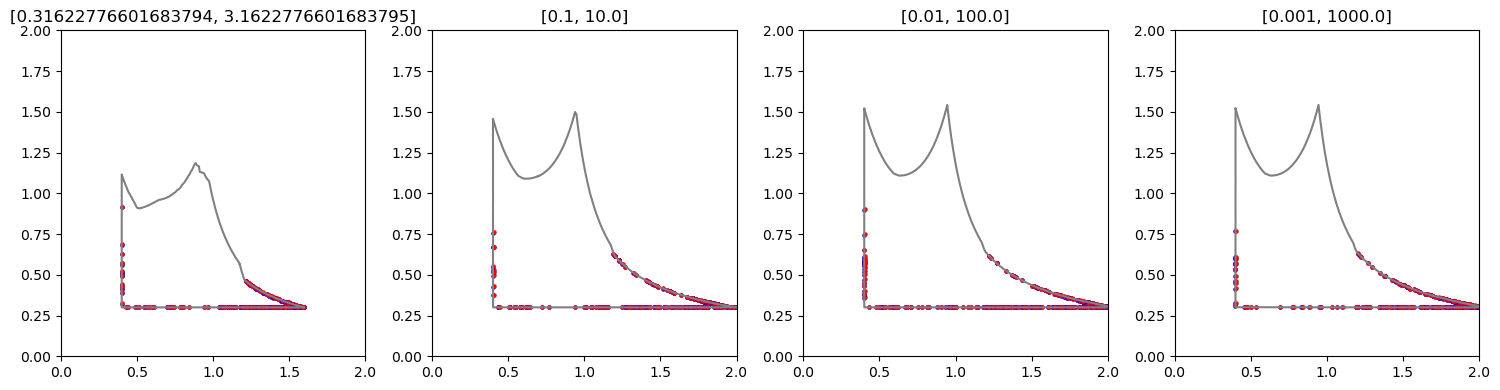

In [7]:

parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above

parlims_nums_convergedonly=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 16, 21, 26, 36, 41, 46, 61, 66, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above


tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
fig,axes=plt.subplots(1,4,figsize=(15,4))
for i in range(len(parlims_nums)-1): #the last one has errors, but it is not needed as boundary already converged
    a=np.log10(extremespars[i][1])
    ashape=np.load("./ashapes/ashape_N6univ_%g_2022_8_23.npy"%a)
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[] #[j0,n,nc,ni,nwrong,n0,nonanalysed]
    details_wrong=[] #[j0,i0, nbp,pbp,goodp,nbs,pbs,goods]
 
    ax=axes[i]
    ax.plot(ashape[0],ashape[1],color="gray")
    ax.set_title(str(extremespars[i]))
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums_convergedonly[i]: 
            wrong_p=analyse_file(os.path.join(checkf,f), outputs, details_wrong,ax=ax)
    all_outputs.append(outputs)
plt.tight_layout()
plt.savefig("inconsistentN6univ_v2.pdf")
plt.show()
    
    

looking at limits 0, [0.31622776601683794, 3.1622776601683795]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[18 16 12 25  9 16 22 19 20 24 13 15 18 16 17 19]
3 jobs with [1, 2) % of wrong, but next bin points
10 jobs with [2, 3) % of wrong, but next bin points
3 jobs with [3, 4) % of wrong, but next bin points
good statistics:
[711 713 717 704 720 713 707 710 709 705 716 714 711 713 712 711]
[0.97530864 0.97805213 0.98353909 0.96570645 0.98765432 0.97805213
 0.96982167 0.9739369  0.97256516 0.96707819 0.98216735 0.97942387
 0.97530864 0.97805213 0.97668038 0.9739726 ]
3 jobs with [96, 97) % of coincident (same bin) points
10 jobs with [97, 98) % of coincident (same bin) points
3 jobs with [98, 99) % of coincident (same bin) points


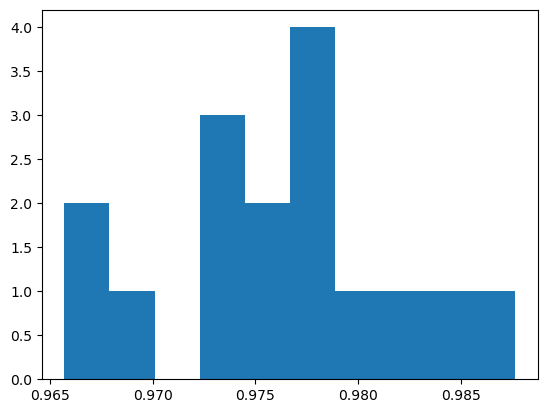

looking at limits 1, [0.1, 10.0]
11
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 11
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[25 31 19 37 33 23 20 31 25 23 30]
1 jobs with [1, 2) % of wrong, but next bin points
5 jobs with [2, 3) % of wrong, but next bin points
5 jobs with [3, 4) % of wrong, but next bin points
good statistics:
[964 963 970 961 956 966 969 958 964 966 959]
[0.97472194 0.96881288 0.98078868 0.96292585 0.96663296 0.97674419
 0.97977755 0.96865521 0.97472194 0.97674419 0.96966633]
5 jobs with [96, 97) % of coincident (same bin) points
5 jobs with [97, 98) % of coincident (same bin) points
1 jobs with [98, 99) % of coincident (same bin) points


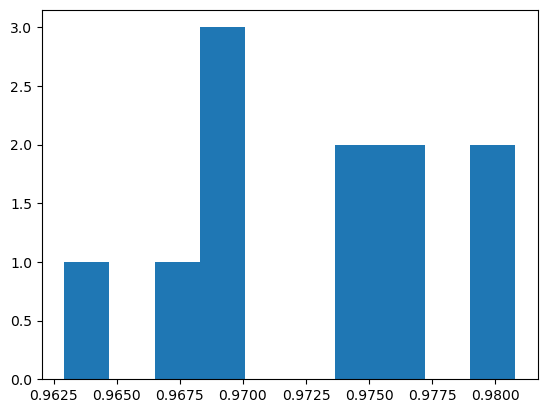

looking at limits 2, [0.01, 100.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[26 34 20 29 23 20 24 18 16 27 31 21 24 19 21 16]
6 jobs with [1, 2) % of wrong, but next bin points
8 jobs with [2, 3) % of wrong, but next bin points
2 jobs with [3, 4) % of wrong, but next bin points
good statistics:
[1003  994 1009 1000 1006 1009 1005 1011 1013 1002  998 1008 1005 1009
 1007 1013]
[0.97473275 0.96692607 0.98056365 0.9718173  0.9776482  0.98056365
 0.97667638 0.98250729 0.98445092 0.97376093 0.96987366 0.97959184
 0.97667638 0.98151751 0.97957198 0.98445092]
2 jobs with [96, 97) % of coincident (same bin) points
8 jobs with [97, 98) % of coincident (same bin) points
6 jobs with [98, 99) % of coincident (same bin) points


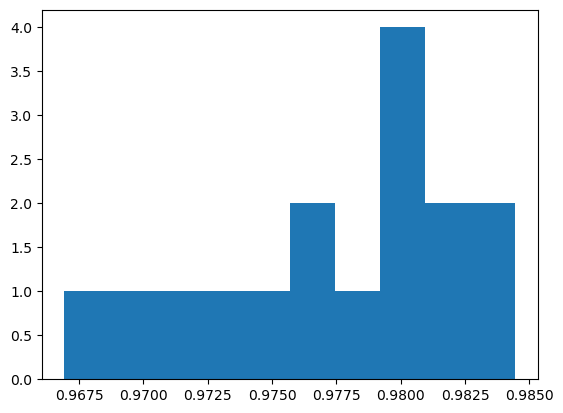

looking at limits 3, [0.001, 1000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[24 25 25 26 25 26 24 16 22 26 21 23 26 28 19 28]
2 jobs with [1, 2) % of wrong, but next bin points
14 jobs with [2, 3) % of wrong, but next bin points
good statistics:
[1006 1011 1005 1004 1005 1004 1006 1014 1008 1004 1009 1007 1004 1007
 1011 1002]
[0.97669903 0.97586873 0.97572816 0.97475728 0.97572816 0.97475728
 0.97669903 0.98446602 0.97864078 0.97475728 0.97961165 0.9776699
 0.97475728 0.97294686 0.9815534  0.97281553]
14 jobs with [97, 98) % of coincident (same bin) points
2 jobs with [98, 99) % of coincident (same bin) points


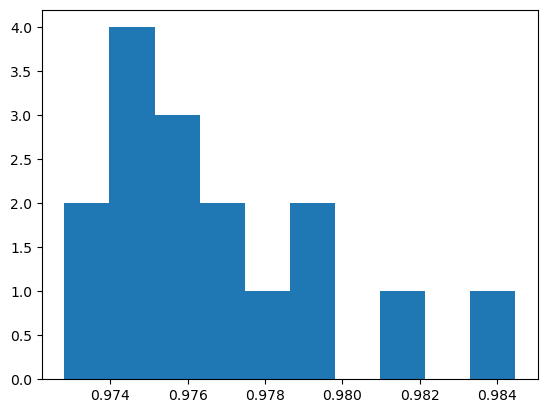

In [8]:
for i in range(len(parlims_nums)-1): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])

In [9]:
#now analyse the jobs for parameter ranges -0.3,0.3/ -0.7,0.7
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder='../clustersearch'
subfolder="2022_01_22_N6univ_otherp"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="47623780"
njobs=32
basename="N6univ"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.3),10**(0.3)],[10**(-0.7),10**(0.7)]] #copy-paste from the boundary search
absder="True"

#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print()
                print( i,"last 1500 iterations:",np.sum(new[-1500:]), "last 1000:", np.sum(new[-1000:]),"last 500:", np.sum(new[-500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,
6 last 1500 iterations: 3.0 last 1000: 1.0 last 500: 0.0
7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,
14 last 1500 iterations: 28.0 last 1000: 4.0 last 500: 2.0
15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 !!!not long enough 310 29.0 5057.0
23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,32 !!!not long enough 1485 0.0 6.0


In [14]:
checkf=os.path.join(datafolder, "2022_01_22_N6univ_otherp/tocheck_N6univ") 
#tolerance 0.005
print(checkf)
command="wolframscript -file ../bin/N6univ_manualfix_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_01_22_N6univ_otherp/tocheck_N6univ
mat_N6univ_0.in
mat_N6univ_0_checked2.out
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_01_22_N6univ_otherp/tocheck_N6univ
Defined GRF

                                   -308
General::munfl: 0.501187 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.501187 3.70477 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.731444 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

General::stop: Further output of General::munfl will be suppressed during this calculation.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a correspondin

 not correct0.404039,1.05501;0.4,1.05;686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,mat_N6univ_14.in
mat_N6univ_14_checked2.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,

 not correct1.23299,0.324968;1.23,0.325;197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,

 not correct1.53643,0.36998;1.535,0.37;356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,
 not correct1.44035,0.404927;1.44,0.405;382,383,384,385,386,
 not correct1.4155,0.414983;1.415,0.415;388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,
 not correct1.34515,0.44999;1.345,0.45;409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568

 not correct0.40504,0.752338;0.4,0.75;536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,77

 not correct1.34514,0.449998;1.345,0.45;409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,

 not correct0.404377,0.829967;0.4,0.83;568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,8

looking at limits 0, [0.5011872336272722, 1.9952623149688795]
mat_N6univ_10_allcomparisons.out
previous bin position 0.865,0.3 0.864755,0.302798 -0.00024523,0.00279823
next bin steepness 0.96,0.3 0.96356,0.305028 0.00356039,0.00502772
previous bin position 0.995,0.3 0.994971,0.304201 -0.0000293695,0.00420097
previous bin position 1.2,0.3 1.19997,0.304359 -0.0000278139,0.00435948
previous bin steepness 1.29,0.3 1.29108,0.299997 0.00107741,-0.00000291528
previous bin steepness 1.28,0.305 1.28045,0.304978 0.000451423,-0.0000224759
previous bin steepness 1.255,0.315 1.25673,0.314901 0.0017347,-0.0000990419
previous bin position 1.22,0.33 1.21985,0.331565 -0.000152441,0.00156454
previous bin position 0.4,0.39 0.399977,0.393037 -0.0000233811,0.00303708
0.30000000000000004 : 1
0.8 : 1
0.9 : 2
1.1 : 1
1.2000000000000002 : 4
mat_N6univ_30_allcomparisons.out
previous bin position 0.67,0.3 0.669986,0.304747 -0.000014441,0.0047469
previous bin position 0.975,0.3 0.974998,0.30023 -0.00000191943,0.0

next bin position 1.55,0.3 1.55562,0.303881 0.005621,0.00388142
next bin position 1.63,0.3 1.63506,0.303335 0.00505999,0.00333547
previous bin steepness 1.765,0.3 1.7699,0.299982 0.00490226,-0.0000178202
previous bin position 1.815,0.3 1.81445,0.300643 -0.00054967,0.000642702
previous bin steepness 1.825,0.3 1.82621,0.299949 0.00120939,-0.0000513224
next bin position 1.75,0.31 1.75557,0.312966 0.00557496,0.00296611
next bin position 1.715,0.32 1.72015,0.320582 0.00515259,0.000582343
previous bin steepness 1.585,0.355 1.58546,0.354997 0.000459747,-0.00000260929
previous bin steepness 1.53,0.37 1.53377,0.369952 0.00377408,-0.0000476145
previous bin steepness 1.48,0.385 1.4813,0.384985 0.00130312,-0.0000153428
previous bin steepness 1.475,0.39 1.47537,0.389999 0.000374544,-0.00000114366
previous bin steepness 1.465,0.395 1.46546,0.394964 0.000461259,-0.0000357505
previous bin steepness 1.445,0.4 1.44896,0.399977 0.00396221,-0.0000233304
previous bin steepness 1.44,0.405 1.4403,0.404946 0.

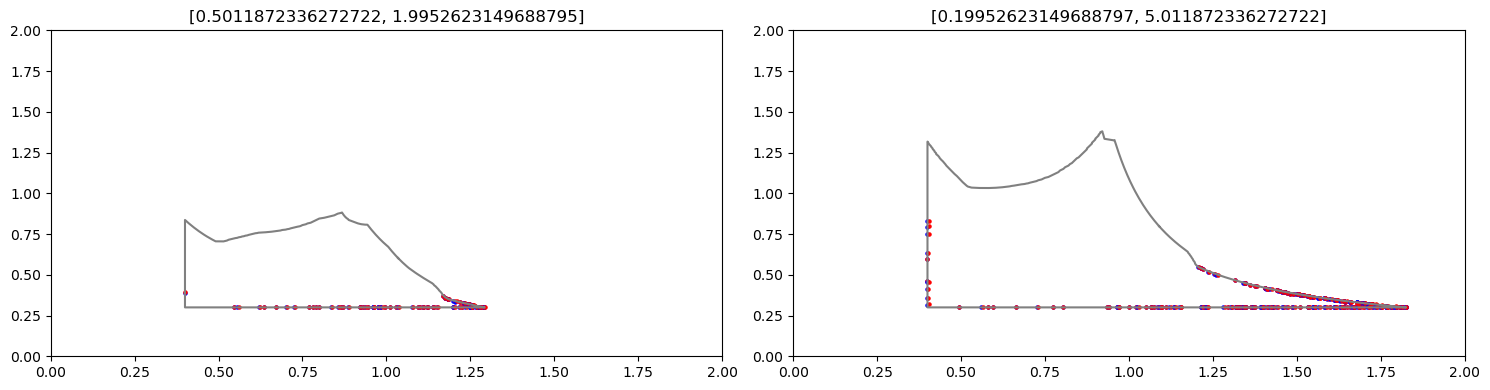

In [10]:
checkf=os.path.join(datafolder, "2022_01_22_N6univ_otherp/tocheck_N6univ") 
parlims_nums=[[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
              [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 23, 25, 27, 29]] 
parlims_nums_converged=[[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
              [1, 3, 7, 9, 11, 15, 17, 19, 23, 25, 27, 29]] 
tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
fig,axes=plt.subplots(1,2,figsize=(15,4))
for i in range(len(parlims_nums)): 
    a=np.log10(extremespars[i][1])
    ashape=np.load("./ashapes/ashape_N6univ_%g_2022_8_23.npy"%a)
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
 
    ax=axes[i]
    ax.plot(ashape[0],ashape[1],color="gray")
    ax.set_title(str(extremespars[i]))
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    outputs=[] #[j0,n,nc,ni,nwrong,n0,nonanalysed]
    details_wrong=[] #[j0,i0, nbp,pbp,goodp,nbs,pbs,goods]
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums_converged[i]:
            print(f)
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong,ax=ax) #modifies (appends to) outputs and details_wrong
    
    all_outputs.append(outputs)
plt.tight_layout()
plt.show()

looking at limits 0, [0.5011872336272722, 1.9952623149688795]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[ 9  7  6  5  9  8  5 10  6  7  7  4  3 10  5  5]
6 jobs with [1e-08, 1) % of wrong, but next bin points
10 jobs with [1, 2) % of wrong, but next bin points
good statistics:
[502 504 505 505 501 502 506 501 504 504 503 507 508 501 506 506]
[0.98238748 0.98630137 0.98825832 0.99019608 0.98235294 0.98431373
 0.99021526 0.98043053 0.98823529 0.98630137 0.98627451 0.99217221
 0.99412916 0.98043053 0.99021526 0.99021526]
10 jobs with [98, 99) % of coincident (same bin) points
6 jobs with [99, 100) % of coincident (same bin) points


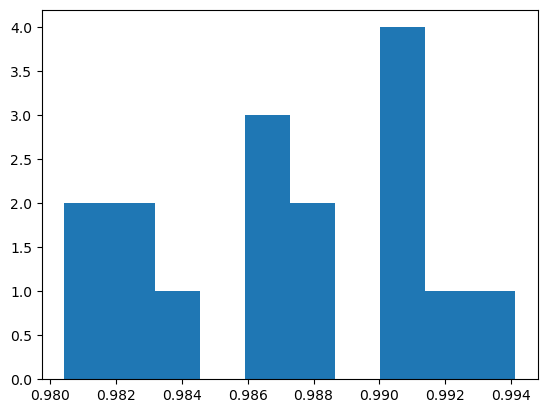

looking at limits 1, [0.19952623149688797, 5.011872336272722]
12
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 12
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[20 20 27 25 14 21 19 23 26 25 24 29]
1 jobs with [1, 2) % of wrong, but next bin points
9 jobs with [2, 3) % of wrong, but next bin points
2 jobs with [3, 4) % of wrong, but next bin points
good statistics:
[870 870 863 865 876 869 871 866 864 865 865 861]
[0.97752809 0.97752809 0.96966292 0.97191011 0.98426966 0.97640449
 0.97865169 0.97412823 0.97078652 0.97191011 0.97300337 0.96741573]
2 jobs with [96, 97) % of coincident (same bin) points
9 jobs with [97, 98) % of coincident (same bin) points
1 jobs with [98, 99) % of coincident (same bin) points


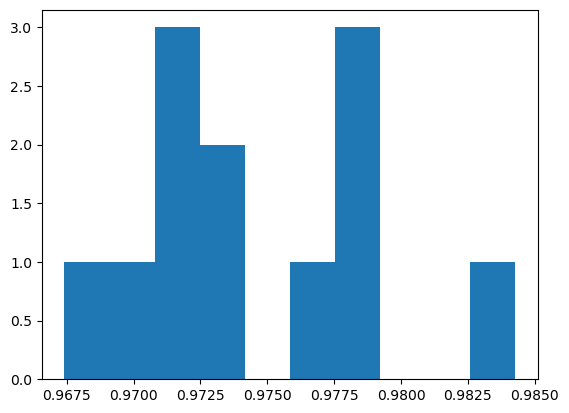

In [11]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])